In [1]:
# coding=utf-8 
from selenium import webdriver 
from selenium.webdriver.common.by import By
import time 
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

In [2]:
from selenium import webdriver
#绕过反爬监测
option = webdriver.ChromeOptions()
option.add_experimental_option('excludeSwitches', ['enable-automation'])
option.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome(options=option)
driver.execute_cdp_cmd('Page.addScriptToEvaluateOnNewDocument',
                            {'source': 'Object.defineProperty(navigator, "webdriver", {get: () => undefined})'})

{'identifier': '2'}

In [3]:
driver.maximize_window()
url = "https://news.sohu.com/"
driver.get(url)

In [4]:
#找到对应的输入框
driver.find_element(By.CSS_SELECTOR, ".input.search-input").click()

In [5]:
element = driver.find_element(By.CSS_SELECTOR, ".input.search-input")

In [6]:
element.send_keys("加勒比"+ Keys.RETURN)

In [7]:
windows = driver.window_handles
# 切换到第二个窗口（通常第二个是最新打开的）
driver.switch_to.window(windows[1])  # 注意索引从0开始，所以1是第二个窗口

In [8]:
# 向下滚动到页面底部
# 获取页面的总高度
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # 滚动到页面底部
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # 等待新内容加载
    time.sleep(2)
    
    # 获取新的页面高度
    new_height = driver.execute_script("return document.body.scrollHeight")
    
    # 如果页面高度没有变化，说明已经到底部
    if new_height == last_height:
        break
    
    last_height = new_height

In [9]:
driver.current_url

'https://search.sohu.com/?keyword=%E5%8A%A0%E5%8B%92%E6%AF%94&type=10002&ie=utf8&queryType=default&spm=smpc.channel_258.search-box.1742634536549jKpWGZi_1090'

In [64]:
page_text = driver.page_source

In [65]:
from bs4 import BeautifulSoup

In [66]:
soup = BeautifulSoup(page_text, 'html.parser')

<html lang="zh-cn"><head><meta charset="utf-8"/><meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="搜狐搜索，是搜狐门户下的站内搜索平台，致力于为用户提供精准、便捷的搜索服务，让网民更便捷地获取行业资讯，找到所求。" name="description"/><meta content="smpc" name="data-spm"/><meta content="unsafe-url" name="referrer"/><title>搜狐搜索（加勒比）</title><meta content="搜索,搜狐搜索,站内搜索,网页搜索,新闻搜索,资讯搜索,热门搜索" name="keywords"/><link href="//statics.itc.cn/web/static/images/pic/sohu-logo/favicon.ico" rel="icon" type="image/x-icon"/><script src="//statics.itc.cn/pc_channel_script/jquery-1.12.4.min.js"></script><link href="https://g1.itc.cn/msfe-static-prod/20250318114535/assets/css/pcSearch-5d99ef8024.css" rel="stylesheet"/><style type="text/css">.article-login {
  height: 100%;
  display: flex;
  align-items: center;
  position: relative;
}
.article-login:hover {
  cursor: pointer;
}
.article-login .login-sohu {
  width: 52px;
  height: 28px;
  background: rgba(255, 255, 255, 0.2);
  font-size: 14px;
  font-family: PingFangSC-Medium, PingF
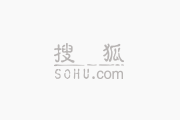
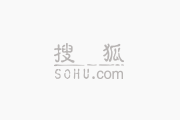
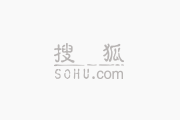
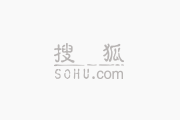
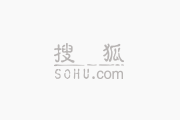
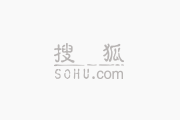
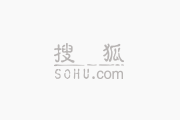
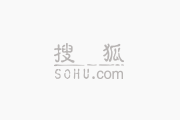
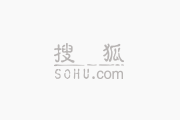
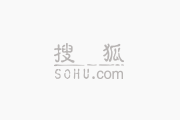
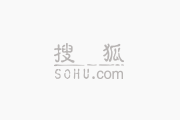
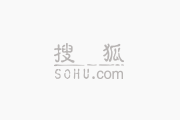
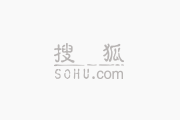
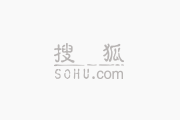
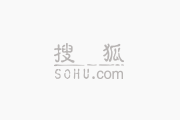
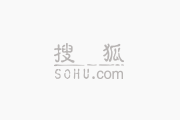
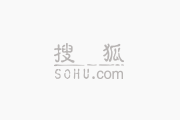
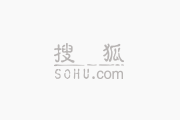
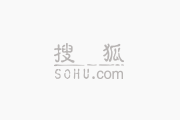
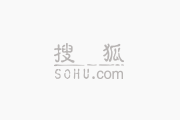
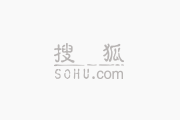
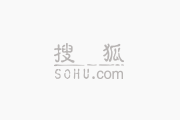
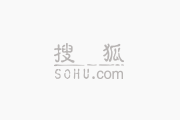
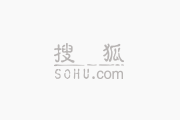
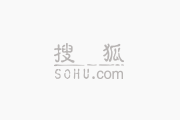
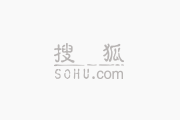
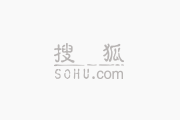
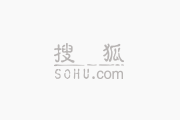
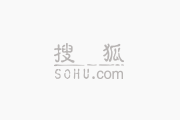
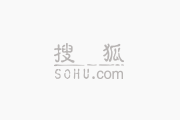
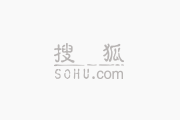
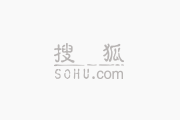
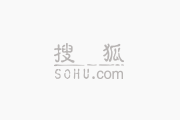
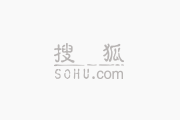

In [67]:
soup

In [70]:
news_list = soup.find_all(name='div',attrs={'class':'cards-content-title'})

In [80]:
str(news_list[0])

'<div class="cards-content-title" data-v-6624dd9d=""><a data-spm-data="1" data-v-6624dd9d="" href="https://www.sohu.com/a/866016425_163278?scm=1019.20001.0.0.0&amp;spm=smpc.csrpage.news-list.1.1742634545258RvKo2ve" target="_blank"><b>加勒比</b>文化体验活动将登陆北京</a></div>'

In [81]:
new_list = []
for news in news_list:
    soup = BeautifulSoup(str(news), 'html.parser')
    a_tag = soup.find('a')
    new_list.append(a_tag)

new_list

[<a data-spm-data="1" data-v-6624dd9d="" href="https://www.sohu.com/a/866016425_163278?scm=1019.20001.0.0.0&amp;spm=smpc.csrpage.news-list.1.1742634545258RvKo2ve" target="_blank"><b>加勒比</b>文化体验活动将登陆北京</a>,
 <a data-spm-data="2" data-v-6624dd9d="" href="https://www.sohu.com/a/857063501_362042?scm=1019.20001.0.0.0&amp;spm=smpc.csrpage.news-list.2.1742634545258RvKo2ve" target="_blank">美国国家海啸预警中心取消<b>加勒比</b>沿海区域警报</a>,
 <a data-spm-data="4" data-v-6624dd9d="" href="https://www.sohu.com/a/862242773_118065?scm=1019.20001.0.0.0&amp;spm=smpc.csrpage.news-list.4.1742634545258RvKo2ve" target="_blank">时尚媒体｜从巴塞罗那到<b>加勒比</b>海：皇家<b>加勒比</b>“海洋神话号”揭幕，开启横跨欧美的梦幻度假新篇章｜广州时尚媒体皇家<b>加勒比</b>国际游轮</a>,
 <a data-spm-data="5" data-v-6624dd9d="" href="https://www.sohu.com/a/866197760_255783?scm=1019.20001.0.0.0&amp;spm=smpc.csrpage.news-list.5.1742634545258RvKo2ve" target="_blank"><b>加勒比</b>文化体验活动将登陆北京</a>,
 <a data-spm-data="7" data-v-6624dd9d="" href="https://www.sohu.com/a/851365540_100144860?scm=1019.20001.0.0

In [87]:
titles = []
links = []
for news in new_list:
    title = news.get_text()
    link = news['href']
    if title and link:    
        titles.append(title)
        links.append(link)

In [88]:
titles

['加勒比文化体验活动将登陆北京',
 '美国国家海啸预警中心取消加勒比沿海区域警报',
 '时尚媒体｜从巴塞罗那到加勒比海：皇家加勒比“海洋神话号”揭幕，开启横跨欧美的梦幻度假新篇章｜广州时尚媒体皇家加勒比国际游轮',
 '加勒比文化体验活动将登陆北京',
 '“加勒比海明珠”哈瓦那景色优美加勒比海岸旅游天堂',
 '加勒比海瓜德罗普岛海域发生5.2级地震',
 '传迪士尼又拍《加勒比海盗》电影约翰尼·德普回归',
 '外媒：中国技术助力加勒比国家粮食安全',
 '加勒比海瓜德罗普岛海域发生5.2级地震',
 '皇家加勒比游轮发布2026-2027年中国航线计划',
 '皇家加勒比订购三燃料动力新邮轮',
 '加勒比海盗：畅游无垠海域，踏上海盗传奇之旅',
 '记者观察：在加勒比“香料之国”感受中国情',
 '第六艘了！皇家加勒比增订新邮轮',
 '记者观察：在加勒比“香料之国”感受中国情',
 '加勒比海远征：英国皇家海军的死亡远征',
 '新《加勒比海盗》电影爆料，诺兰史诗大片《奥德赛》曝剧照',
 '迪丽热巴戴头巾化身加勒比女王红发造型明艳大气',
 '中国援圭医疗队与中铁建（加勒比）公司开展联学共建义诊活动',
 '雅辰酒店集团进军西安，皇家加勒比揭晓新游轮|文旅指南',
 '列国鉴·格林纳达｜记者观察：在加勒比“香料之国”感受中国情',
 '2025加勒比文化体验活动新闻发布会在京举行',
 '列国鉴·格林纳达｜记者观察：在加勒比“香料之国”感受中国情',
 '列国鉴·格林纳达｜记者观察：在加勒比“香料之国”感受中国情',
 '列国鉴·格林纳达｜记者观察：在加勒比“香料之国”感受中国情',
 '皇家加勒比邮轮集团2024年业绩亮眼，2025年展望积极',
 '2025加勒比文化体验活动新闻发布会在北京举行',
 '加勒比海一岛国发现装19具遗体船只',
 '2025加勒比文化体验活动新闻发布会在京举行',
 '外媒曝德普或回归《加勒比海盗》迪士尼官方暂未证实',
 '加勒比共同体政府首脑会议呼吁团结应对全球性挑战',
 '2026年，邂逅欧洲盛夏与加勒比暖冬的梦幻游轮之旅',
 '洪都拉斯以北海域突发地震加勒比海沿岸多国一度发布海啸预警',
 '约翰尼德普要回归加勒比海盗？因前妻艾梅柏污蔑，遭迪士尼除名',
 '加勒比海开曼群岛附近海域发生8.0级地震'

In [89]:
links

['https://www.sohu.com/a/866016425_163278?scm=1019.20001.0.0.0&spm=smpc.csrpage.news-list.1.1742634545258RvKo2ve',
 'https://www.sohu.com/a/857063501_362042?scm=1019.20001.0.0.0&spm=smpc.csrpage.news-list.2.1742634545258RvKo2ve',
 'https://www.sohu.com/a/862242773_118065?scm=1019.20001.0.0.0&spm=smpc.csrpage.news-list.4.1742634545258RvKo2ve',
 'https://www.sohu.com/a/866197760_255783?scm=1019.20001.0.0.0&spm=smpc.csrpage.news-list.5.1742634545258RvKo2ve',
 'https://www.sohu.com/a/851365540_100144860?scm=1019.20001.0.0.0&spm=smpc.csrpage.news-list.7.1742634545258RvKo2ve',
 'https://www.sohu.com/a/866523066_362042?scm=1019.20001.0.0.0&spm=smpc.csrpage.news-list.9.1742634545258RvKo2ve',
 'https://www.sohu.com/a/860611111_258858?scm=1019.20001.0.0.0&spm=smpc.csrpage.news-list.10.1742634545258RvKo2ve',
 'https://www.sohu.com/a/864003362_114911?scm=1019.20001.0.0.0&spm=smpc.csrpage.news-list.11.1742634545258RvKo2ve',
 'https://www.sohu.com/a/866520771_114984?scm=1019.20001.0.0.0&spm=smpc.csr